In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque, defaultdict
import math
from networkx.drawing.nx_agraph import graphviz_layout

In [13]:
G1 = nx.nx_agraph.read_dot('./Dataset/LesMiserables.dot/LesMiserables.dot')
edge_list =[]
for e in G1.edges():
    u,v = e
    edge_list.append((u,v))

node_list = []
for i in G1.nodes():
    node_list.append(i)
    
print(len(edge_list))
print(len(node_list))

254
77


In [3]:
adjacency_list = {}
for edge in edge_list:
    source, target = edge
    if source not in adjacency_list:
        adjacency_list[source] = []
    adjacency_list[source].append(target)
#     # for undirected graph, we also add the reverse edge
    if target not in adjacency_list:
        adjacency_list[target] = []
    adjacency_list[target].append(source)
    
print(adjacency_list)

{'1': ['2'], '2': ['1', '3', '4', '5', '6', '7', '8', '9', '10', '11'], '3': ['2', '4', '11'], '4': ['2', '3', '11'], '5': ['2'], '6': ['2'], '7': ['2'], '8': ['2'], '9': ['2'], '10': ['2'], '11': ['2', '3', '4', '12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73'], '12': ['11'], '13': ['11', '24'], '14': ['11'], '15': ['11'], '16': ['11'], '24': ['11', '13', '25', '26', '28', '30', '32', '17', '18', '19', '20', '21', '22', '23', '31'], '25': ['11', '24', '26', '27', '28', '69', '70', '71', '42', '43', '51'], '26': ['11', '24', '25', '27', '28', '49', '56', '69', '70', '71', '72', '42', '43', '40', '41', '76'], '27': ['11', '25', '26', '28', '44', '50', '52', '56', '73', '18', '55'], '28': ['11', '24', '25', '26', '27', '29', '30', '32', '34', '44', '49', '59', '69', '70', '71', '72', '73'], '29': ['11', '28', '45', '46'], '30': ['11', '24', '

In [4]:
# BFS Implementation
def bfs(graph, root):
    visited, queue = set(), deque([root])
    bfs_tree = {root: []}
    order_visited = [root]
    visited.add(root)  
    while queue:
        vertex = queue.popleft()
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
                if neighbour not in bfs_tree:
                    bfs_tree[neighbour] = []  
                bfs_tree[vertex].append(neighbour)
                order_visited.append(neighbour)
    return bfs_tree, order_visited

# DFS Implementation
def dfs(graph, root, visited=None, order_visited=None, dfs_tree=None):
    if visited is None:
        visited = set()
    if order_visited is None:
        order_visited = []
    if dfs_tree is None:
        dfs_tree = {root: []}
    visited.add(root)
    order_visited.append(root)
    for neighbour in graph[root]:
        if neighbour not in visited:
            dfs_tree[root].append(neighbour)
            dfs_tree[neighbour] = []  
            dfs(graph, neighbour, visited, order_visited, dfs_tree)
    return dfs_tree, order_visited

# Layered Tree Layout
def layered_tree_layout(tree, root):
    levels = {root: 0}
    visited = set()
    def recurse(node, level):
        visited.add(node)
        for child in tree[node]:
            if child not in visited:
                levels[child] = level + 1
                recurse(child, level + 1)
    recurse(root, 0)
    return levels

# Time Complexity Analysis
start_time = time.time()
bfs_tree, bfs_order = bfs(adjacency_list, '1')
end_time = time.time()
print(f"BFS Time Complexity: {end_time - start_time}")

start_time = time.time()
dfs_tree, dfs_order = dfs(adjacency_list, '1')
end_time = time.time()
print(f"DFS Time Complexity: {end_time - start_time}")

# Apply to Les Misérables network
bfs_tree, bfs_order = bfs(adjacency_list, '1')
dfs_tree, dfs_order = dfs(adjacency_list, '1')

# Layered Tree Layout
bfs_layout = layered_tree_layout(bfs_tree, '1')
dfs_layout = layered_tree_layout(dfs_tree, '1')

print(f'\nBFS = {bfs_order}\n')
print(bfs_tree)
print(f"\nDFS = {dfs_order}\n")
print(dfs_tree)

print(f'\n{dfs_layout}')

BFS Time Complexity: 0.0
DFS Time Complexity: 0.0

BFS = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73', '17', '18', '19', '20', '21', '22', '23', '31', '42', '43', '51', '40', '41', '76', '55', '46', '58', '63', '47', '60', '61', '62', '64', '66', '67', '74', '75', '77', '57', '53', '54', '68', '48']

{'1': ['2'], '2': ['3', '4', '5', '6', '7', '8', '9', '10', '11'], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': ['12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73'], '12': [], '13': [], '14': [], '15': [], '16': [], '24': ['17', '18', '19', '20', '21', '22', '23', '31'], '25': ['42', '43', '51'], '26': ['40

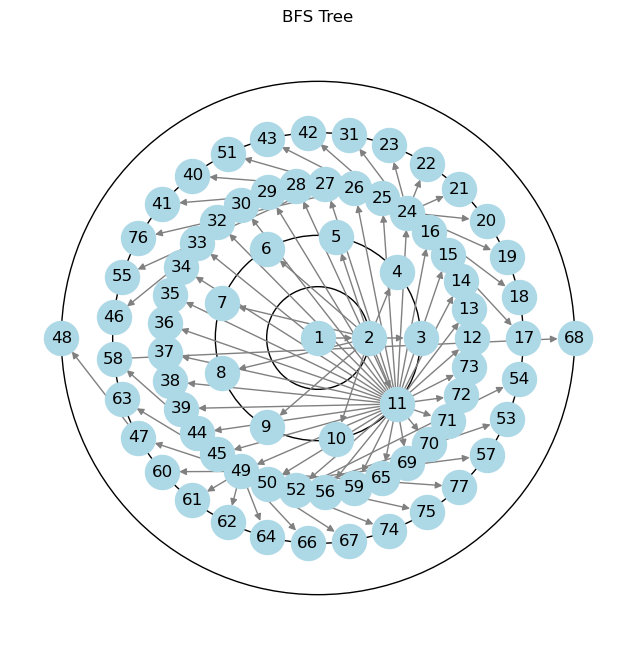

In [5]:
def radial_positions(tree, root, bfs_layout, scale=1):
    pos = {root: (0, 0)}  # root is at the center
    for level in range(1, max(bfs_layout.values()) + 1):
        nodes_at_level = [node for node, node_level in bfs_layout.items() if node_level == level]
        for i, node in enumerate(nodes_at_level):
            angle = 2 * math.pi * i / len(nodes_at_level)  
            x = scale * level * math.cos(angle)
            y = scale * level * math.sin(angle)
            pos[node] = (x, y)
    return pos


#defining the position of nodes
bfs_pos = radial_positions(bfs_tree, '1', bfs_layout)

# Draw the BFS tree
plt.figure(figsize=(8, 8))

max_level = round(max(bfs_pos.values(), key=lambda x: (x[0]**2 + x[1]**2)**0.5)[0])
for level in range(max_level + 1):
    circle = plt.Circle((0, 0), level, color='black', fill=False)
    plt.gca().add_patch(circle)

bfs_tree_graph = nx.DiGraph(bfs_tree)
nx.draw(bfs_tree_graph, bfs_pos, with_labels=True, node_size=600, node_color='lightblue', edge_color='gray')

plt.title('BFS Tree')
plt.xlim(-max_level-1, max_level+1)
plt.ylim(-max_level-1, max_level+1)
plt.gca().set_aspect('equal')
plt.show()


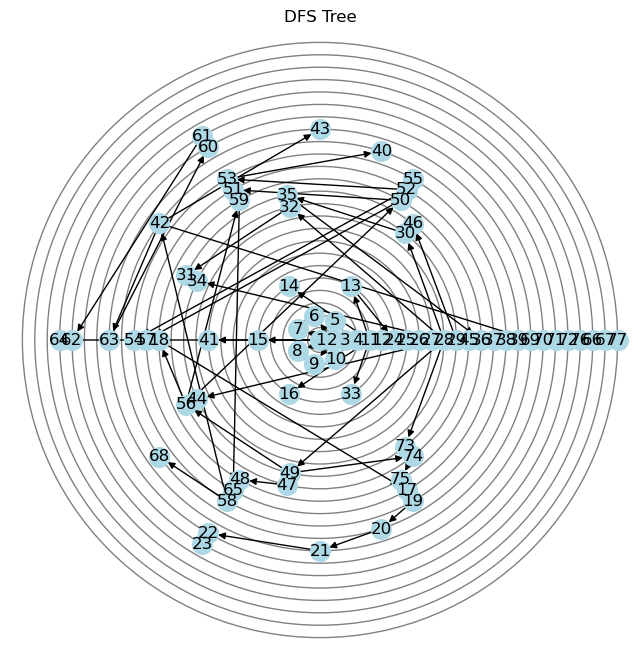

In [6]:
# Convert the DFS tree into a NetworkX DiGraph object
dfs_tree_graph = nx.DiGraph(dfs_tree)

# Get the layout for the DFS tree
dfs_layout = layered_tree_layout(dfs_tree, '1')

# Get positions for the DFS tree
dfs_pos = radial_positions(dfs_tree, '1', dfs_layout)


# Draw the DFS tree
plt.figure(figsize=(8, 12))

max_level = round(max(dfs_pos.values(), key=lambda x: (x[0]**2 + x[1]**2)**0.5)[0])
for level in range(max_level + 1):
    circle = plt.Circle((0, 0), level, color='gray', fill=False)
    plt.gca().add_patch(circle)

dfs_tree_graph = nx.DiGraph(dfs_tree)
nx.draw(dfs_tree_graph, dfs_pos, with_labels=True, node_size=200, node_color='lightblue', edge_color='black')

plt.title('DFS Tree')
plt.xlim(-max_level-1, max_level+1)
plt.ylim(-max_level-1, max_level+1)
plt.gca().set_aspect('equal')
plt.show()


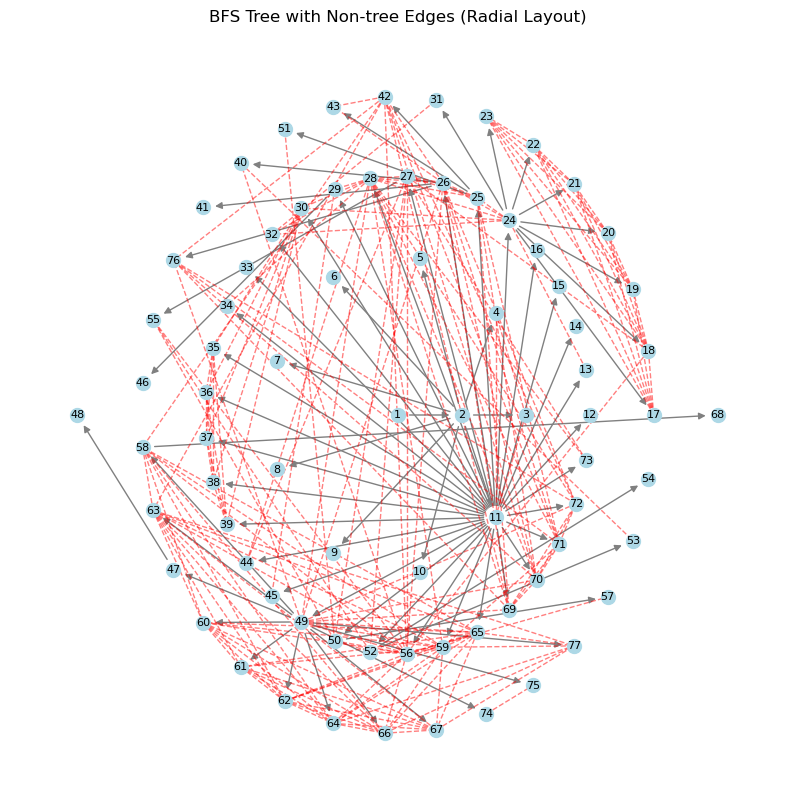

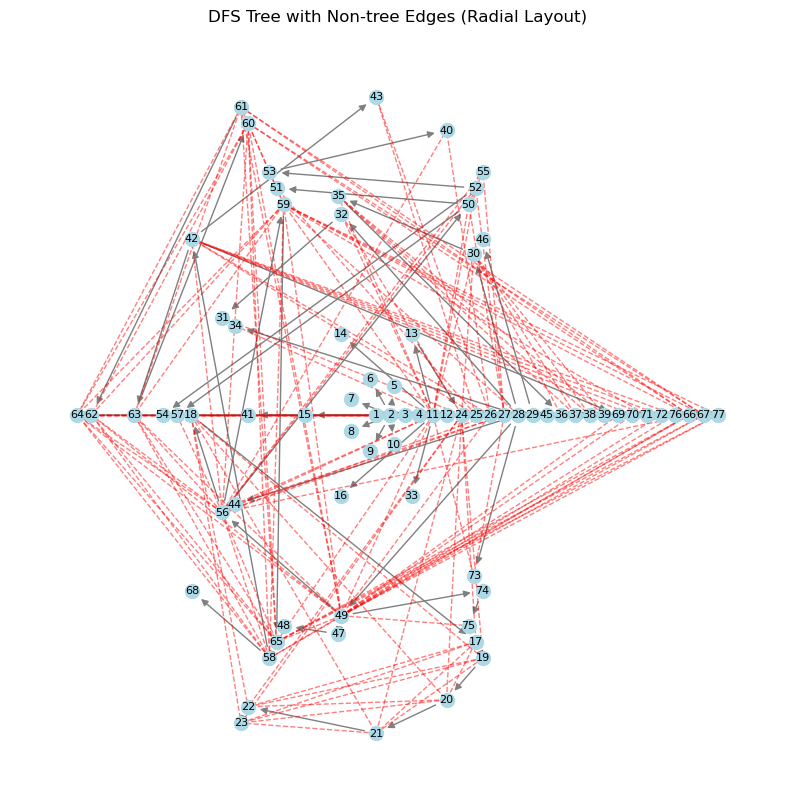

In [18]:
def radial_positions_for_all(graph, tree, root, layout, scale=1):
    # Start with radial positions for the tree
    pos = radial_positions(tree, root, layout, scale=scale)
    
    # Calculate the maximum level used in the radial layout
    max_level = max(layout.values())
    
    # Ensure all nodes have a position (for isolated nodes not in the tree)
    for node in graph.nodes():
        if node not in pos:
            pos[node] = (0, 0)  # Assign a default position, or place them on an outer circle
    
    # Adjust positions of nodes not in the tree
    non_tree_nodes = [n for n in graph.nodes() if n not in pos]
    if non_tree_nodes:  # Check if non_tree_nodes is not empty to avoid ZeroDivisionError
        angle_step = 2 * math.pi / len(non_tree_nodes)
        for i, node in enumerate(non_tree_nodes):
            angle = i * angle_step
            x = (max_level + 1) * scale * math.cos(angle)  # Place outside the tree
            y = (max_level + 1) * scale * math.sin(angle)
            pos[node] = (x, y)
    
    return pos


# Calculate
bfs_all_pos = radial_positions_for_all(G1, bfs_tree_graph, '1', bfs_layout)
dfs_all_pos = radial_positions_for_all(G1, dfs_tree_graph, '1', dfs_layout)

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G1, bfs_all_pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G1, bfs_all_pos, font_size=8)
nx.draw_networkx_edges(bfs_tree_graph, bfs_all_pos, edgelist=bfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, bfs_all_pos, edgelist=non_tree_edges_bfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('BFS Tree with Non-tree Edges (Radial Layout)')
plt.axis('off') # Turn off the axis
plt.show()

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G1, dfs_all_pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G1, dfs_all_pos, font_size=8)
nx.draw_networkx_edges(dfs_tree_graph, dfs_all_pos, edgelist=dfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, dfs_all_pos, edgelist=non_tree_edges_dfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('DFS Tree with Non-tree Edges (Radial Layout)')
plt.axis('off') # Turn off the axis
plt.show()

In [7]:
def bfs_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {root: (0, 0)}
    for level in range(1, max(levels.values()) + 1):
        nodes_at_level = [node for node, node_level in levels.items() if node_level == level]
        for i, node in enumerate(nodes_at_level):
            pos[node] = (i - len(nodes_at_level) / 2, -level)  # distribute nodes evenly across the x-axis
    return pos

def dfs_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {root: (0, 0)}
    for level in range(1, max(levels.values()) + 1):
        nodes_at_level = [node for node, node_level in levels.items() if node_level == level]
        for i, node in enumerate(nodes_at_level):
            pos[node] = (i - len(nodes_at_level) / 2, -level)  # distribute nodes evenly across the x-axis
    return pos


bfs_pos = bfs_positions(bfs_tree, '1')
dfs_pos = dfs_positions(dfs_tree, '1')

bfs_tree_graph = nx.DiGraph(bfs_tree)
dfs_tree_graph = nx.DiGraph(dfs_tree)

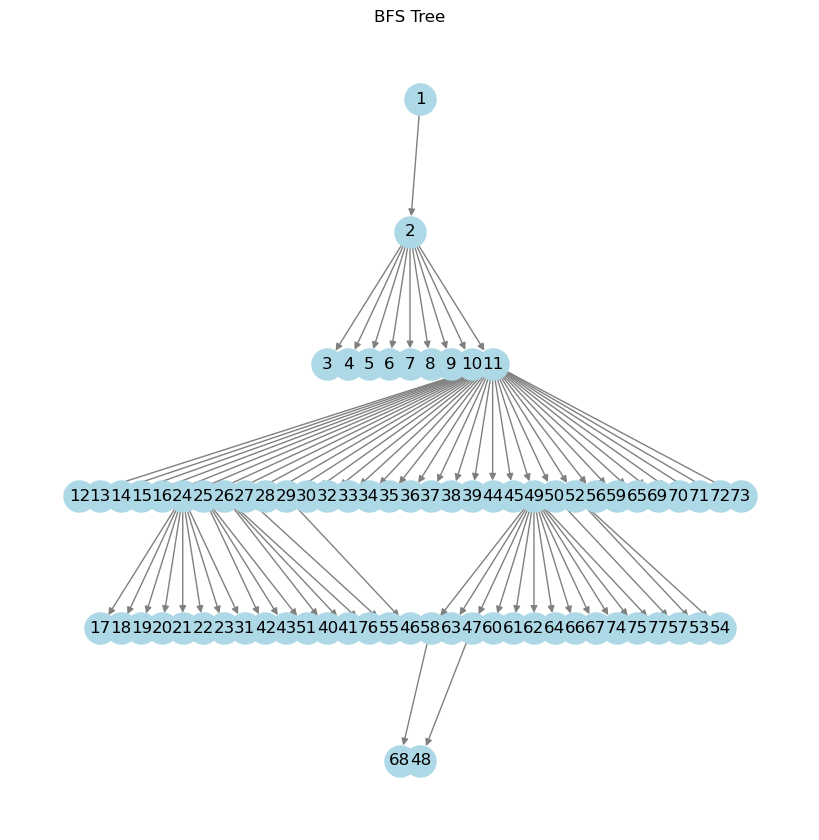

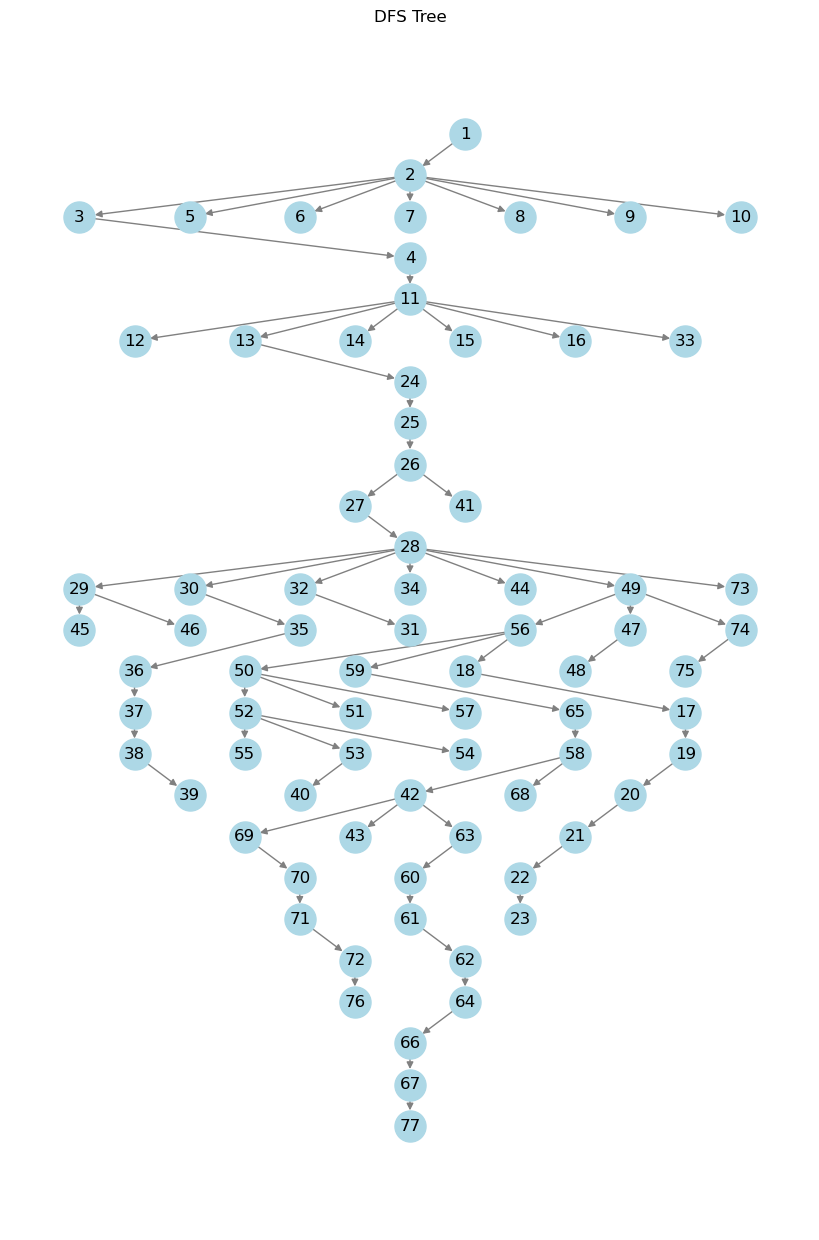

In [8]:
# Draw the BFS tree
plt.figure(figsize=(8, 8))
nx.draw(bfs_tree_graph, bfs_pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
labels = nx.get_node_attributes(bfs_tree_graph, 'label') 
nx.draw_networkx_labels(bfs_tree_graph, bfs_pos, labels=labels)
plt.title('BFS Tree')
plt.show()

# Draw the DFS tree
plt.figure(figsize=(8, 12))
nx.draw(dfs_tree_graph, dfs_pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
labels = nx.get_node_attributes(dfs_tree_graph, 'label') 
nx.draw_networkx_labels(dfs_tree_graph, dfs_pos, labels=labels)
plt.title('DFS Tree')
plt.show()


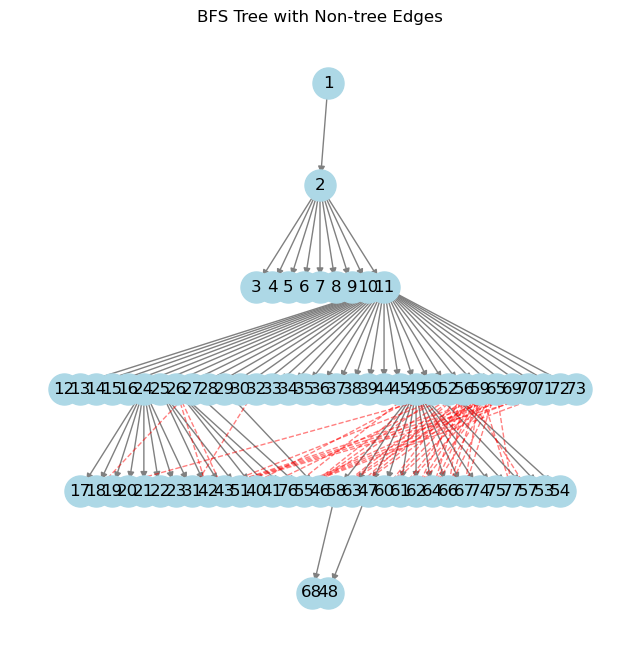

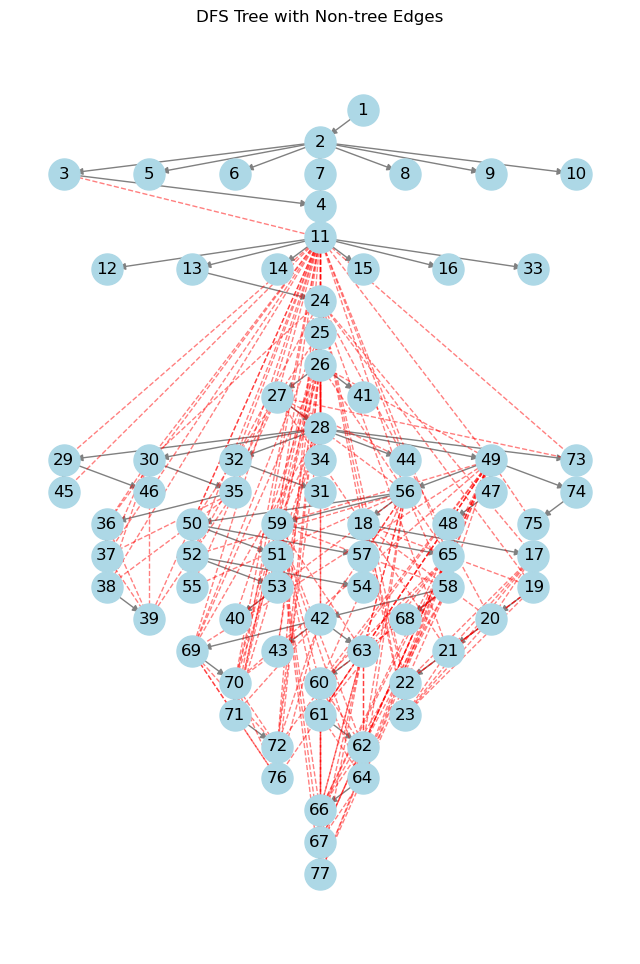

In [14]:
# Assuming bfs_tree_graph and dfs_tree_graph are NetworkX DiGraphs of the BFS and DFS trees respectively

# Define non_tree_edges for BFS
bfs_tree_edges = set(bfs_tree_graph.edges())
non_tree_edges_bfs = [(u, v) for u, v in G1.edges() if (u, v) not in bfs_tree_edges and (v, u) not in bfs_tree_edges]

# Define non_tree_edges for DFS
dfs_tree_edges = set(dfs_tree_graph.edges())
non_tree_edges_dfs = [(u, v) for u, v in G1.edges() if (u, v) not in dfs_tree_edges and (v, u) not in dfs_tree_edges]

# Now we can draw the BFS and DFS trees with non-tree edges
# Draw the BFS tree with non-tree edges
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(bfs_tree_graph, bfs_pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(bfs_tree_graph, bfs_pos)
nx.draw_networkx_edges(bfs_tree_graph, bfs_pos, edgelist=bfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, bfs_pos, edgelist=non_tree_edges_bfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('BFS Tree with Non-tree Edges')
plt.axis('off')  # Turn off the axis
plt.show()

# Draw the DFS tree with non-tree edges
plt.figure(figsize=(8, 12))
nx.draw_networkx_nodes(dfs_tree_graph, dfs_pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(dfs_tree_graph, dfs_pos)
nx.draw_networkx_edges(dfs_tree_graph, dfs_pos, edgelist=dfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, dfs_pos, edgelist=non_tree_edges_dfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('DFS Tree with Non-tree Edges')
plt.axis('off')  # Turn off the axis
plt.show()



DFS Tree with Root 1:
{'1': ['2'], '2': ['3', '5', '6', '7', '8', '9', '10'], '3': ['4'], '4': ['11'], '11': ['12', '13', '14', '15', '16', '33'], '12': [], '13': ['24'], '24': ['25'], '25': ['26'], '26': ['27', '41'], '27': ['28'], '28': ['29', '30', '32', '34', '44', '49', '73'], '29': ['45', '46'], '45': [], '46': [], '30': ['35'], '35': ['36'], '36': ['37'], '37': ['38'], '38': ['39'], '39': [], '32': ['31'], '31': [], '34': [], '44': [], '49': ['56', '47', '74'], '56': ['50', '59', '18'], '50': ['52', '51', '57'], '52': ['55', '53', '54'], '55': [], '53': ['40'], '40': [], '54': [], '51': [], '57': [], '59': ['65'], '65': ['58'], '58': ['42', '68'], '42': ['69', '43', '63'], '69': ['70'], '70': ['71'], '71': ['72'], '72': ['76'], '76': [], '43': [], '63': ['60'], '60': ['61'], '61': ['62'], '62': ['64'], '64': ['66'], '66': ['67'], '67': ['77'], '77': [], '68': [], '18': ['17'], '17': ['19'], '19': ['20'], '20': ['21'], '21': ['22'], '22': ['23'], '23': [], '47': ['48'], '48': []

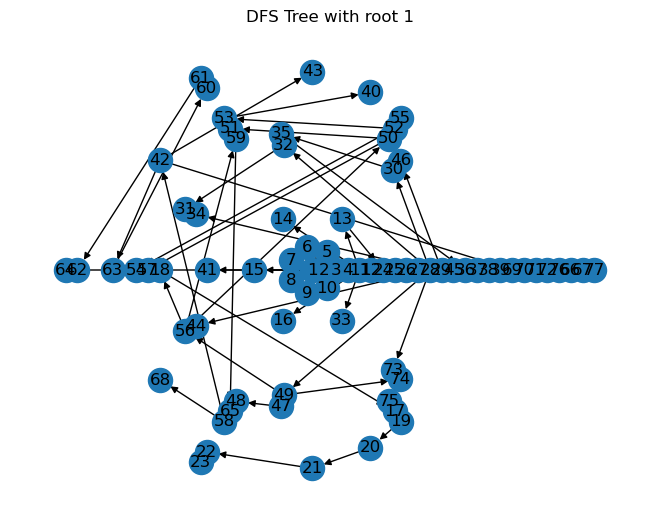

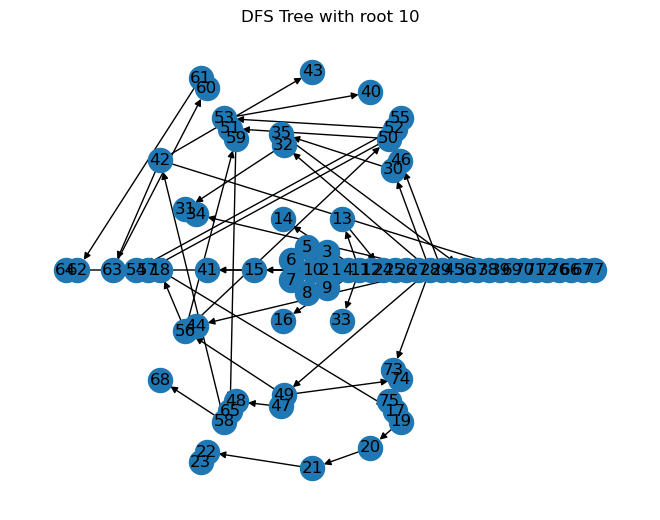

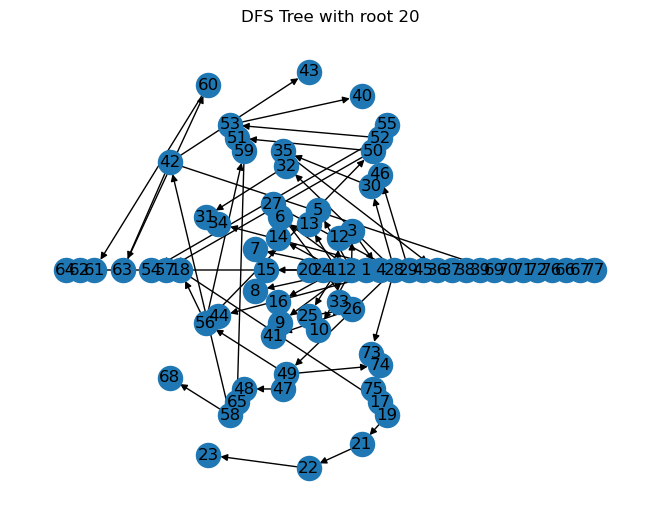

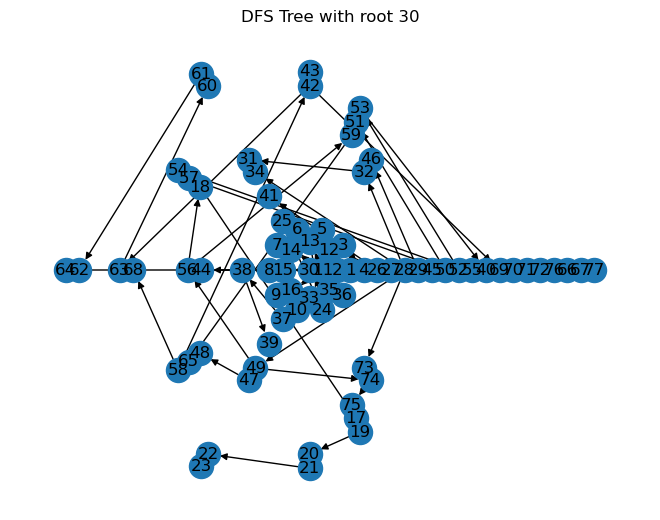

In [20]:

roots = ['1', '10', '20', '30']  # Example root nodes
for root in roots:
    dfs_tree, _ = dfs(adjacency_list, root)
    print(f"\nDFS Tree with Root {root}:")
    print(dfs_tree)

# Code for generating multiple DFS spanning trees with different roots
roots = ['1', '10', '20', '30']  # example root nodes
for root in roots:
    dfs_tree, dfs_order = dfs(adjacency_list, root)
    dfs_layout = layered_tree_layout(dfs_tree, root)
    dfs_pos = radial_positions(dfs_tree, root, dfs_layout)
    plt.figure()
    nx.draw(nx.DiGraph(dfs_tree), dfs_pos, with_labels=True)
    plt.title(f'DFS Tree with root {root}')
    plt.show()